# Importing Necessary Libraries

In [12]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Loading Data

In [13]:
df_act = pd.read_csv("/kaggle/input/movies/movies.csv")

df_act.head(5)


,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [14]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28610 non-null  int64  
 1   title                 28610 non-null  object 
 2   genres                28562 non-null  object 
 3   overview              28610 non-null  object 
 4   rating                28610 non-null  float64
 5   spoken_languages      28408 non-null  object 
 6   cast                  28477 non-null  object 
 7   crew                  28584 non-null  object 
 8   vote_average          28610 non-null  float64
 9   vote_count            28610 non-null  float64
 10  popularity            28610 non-null  float64
 11  budget                28610 non-null  int64  
 12  keywords              27442 non-null  object 
 13  production_companies  27547 non-null  object 
 14  revenue               28610 non-null  float64
 15  runtime            

In [15]:
df_act.isnull().sum()

id                         0
title                      0
genres                    48
overview                   0
rating                     0
spoken_languages         202
cast                     133
crew                      26
vote_average               0
vote_count                 0
popularity                 0
budget                     0
keywords                1168
production_companies    1063
revenue                    0
runtime                    0
dtype: int64

In [17]:
df_act.dropna(inplace=True)

## tags which will be used for recommending by filtering according to inputted movie

In [18]:
df_act['tags'] = df_act['spoken_languages'] + ' ' + df_act['keywords'] + df_act['genres'] + df_act['cast'] + df_act['crew']+df_act['overview'] + df_act['production_companies']

df_act.head(5)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,tags
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,English jealousy toy boy friendship friends ri...
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,English jealousy toy boy friendship friends ri...
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,English jealousy toy boy friendship friends ri...
3,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",2.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,English jealousy toy boy friendship friends ri...
4,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.5,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,English jealousy toy boy friendship friends ri...


In [19]:
df_act = df_act.drop(['rating','spoken_languages','vote_average','vote_count','popularity','budget','revenue','runtime','cast','keywords','crew','genres','overview','production_companies'],axis=1)
df_act.head(5)

,id,title,tags
0,862,Toy Story,English jealousy toy boy friendship friends ri...
1,862,Toy Story,English jealousy toy boy friendship friends ri...
2,862,Toy Story,English jealousy toy boy friendship friends ri...
3,862,Toy Story,English jealousy toy boy friendship friends ri...
4,862,Toy Story,English jealousy toy boy friendship friends ri...


In [20]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26612 entries, 0 to 28609
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26612 non-null  int64 
 1   title   26612 non-null  object
 2   tags    26612 non-null  object
dtypes: int64(1), object(2)
memory usage: 831.6+ KB


In [21]:
df_act.duplicated().sum()

18816

In [22]:
df_act = df_act.drop_duplicates()

df_act.head(5)

,id,title,tags
0,862,Toy Story,English jealousy toy boy friendship friends ri...
9,8844,Jumanji,English Français boardgame disappearance based...
17,15602,Grumpier Old Men,English fishing bestfriend duringcreditsstinge...
27,31357,Waiting to Exhale,English basedonnovel interracialrelationship s...
32,11862,Father of the Bride Part II,English baby midlifecrisis confidence aging da...


In [23]:
df_act.shape

(7796, 3)

In [24]:
df_act.head(1)['tags']

0    English jealousy toy boy friendship friends ri...
Name: tags, dtype: object

# Content based Recommendation System using TF-IDF

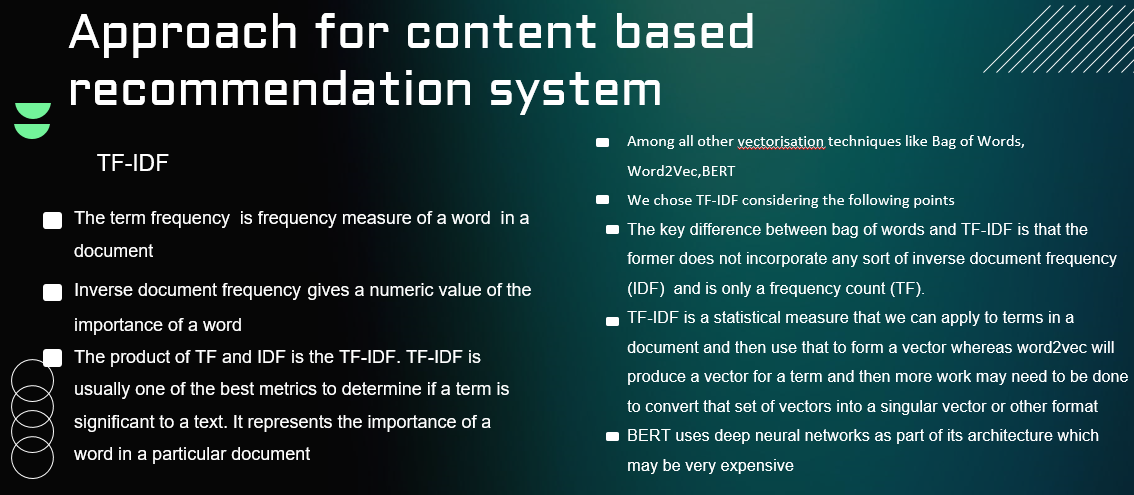

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

Term frequency = count of term in document / number of words in document

Document frequency = occurrence of term in documents

Inverse document frequency = log(Number of documents/ Document frequency)

tf-idf = erm frequency * Inverse document frequency

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,
                      max_features=None, 
                      
                      # this removes the all the characters from the sentences
                      strip_accents = 'unicode',
                      analyzer = 'word',
                      token_pattern = r'\w{1,}',
                      
                      ngram_range = (1, 3), # takes combination 1-3 words
                      stop_words = 'english') # this will remove all the unnecessary words like the that etc.

# Filling NaNs with empty string
df_act['tags'] = df_act['tags'].fillna('')

In [27]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(df_act['tags'])

# Word index, Document index, TF-IDF values

In [42]:
print(tfv.vocabulary_)

{'english': 7566, 'jealousy': 13300, 'toy': 25360, 'boy': 2863, 'friendship': 10513, 'friends': 10494, 'rivalry': 20886, 'comedy': 4554, 'familytomhanks': 9133, 'timallen': 25130, 'woody': 27197, 'andy': 1157, 's': 21384, 'toys': 25364, 'live': 14653, 'happily': 11600, 'room': 21247, 'birthday': 2563, 'brings': 2991, 'buzz': 3304, 'lightyear': 14532, 'scene': 22023, 'afraid': 716, 'losing': 14854, 'place': 18900, 'heart': 11762, 'plots': 18986, 'circumstances': 4202, 'separate': 22423, 'owner': 17828, 'duo': 7091, 'eventually': 8710, 'learns': 14243, 'aside': 1584, 'differences': 6339, 'pixar': 18891, 'animation': 1201, 'studios': 24017, 'english jealousy': 7882, 'friendship friends': 10518, 'comedy familytomhanks': 4570, 'familytomhanks timallen': 9134, 'andy s': 1158, 's toys': 21763, 'live happily': 14658, 's birthday': 21420, 's heart': 21559, 'aside differences': 1585, 'pixar animation': 18892, 'animation studios': 1212, 'comedy familytomhanks timallen': 4571, 'andy s toys': 1159,

In [41]:
print(tfv_matrix)

  (0, 18893)	0.10274651453985757
  (0, 1159)	0.13290592694434208
  (0, 4571)	0.13290592694434208
  (0, 1212)	0.09345306348808198
  (0, 18892)	0.10274651453985757
  (0, 1585)	0.12944745359563495
  (0, 21559)	0.11242020231033716
  (0, 21420)	0.12423251345472199
  (0, 14658)	0.12423251345472199
  (0, 21763)	0.13290592694434208
  (0, 1158)	0.38834236078690487
  (0, 9134)	0.13290592694434208
  (0, 4570)	0.13290592694434208
  (0, 10518)	0.12423251345472199
  (0, 7882)	0.10513567620161206
  (0, 24017)	0.06768021007757616
  (0, 1201)	0.06689386677549278
  (0, 18891)	0.10274651453985757
  (0, 6339)	0.10389510451752391
  (0, 1584)	0.11348951399728978
  (0, 14243)	0.07758219643359017
  (0, 8710)	0.08032090236889528
  (0, 7091)	0.09801344342963847
  (0, 17828)	0.08032090236889528
  (0, 22423)	0.10648425439972996
  :	:
  (7795, 27553)	0.12108875097289122
  (7795, 10127)	0.1188201386307805
  (7795, 3833)	0.2760445286216473
  (7795, 9045)	0.12651437278734418
  (7795, 14268)	0.11512622864497642
  (779

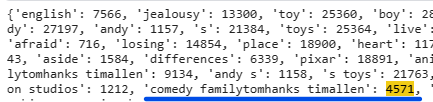

### comedy familytomhanks timallen is the word with index 4571 

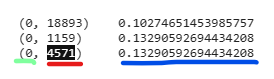


### underlined in green is document index , in red its word index, in blue its tf-idf value

In [47]:
df_act.iloc[0].tags

"English jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolifeAnimation Comedy FamilyTomHanks TimAllen DonRicklesJohnLasseterLed by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.Pixar Animation Studios"

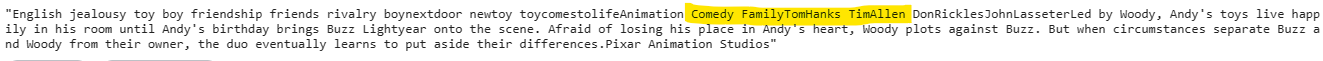

In [49]:
print('\nidf values:')
for ele1, ele2 in zip(tfv.get_feature_names_out(), tfv.idf_):
    print(ele1, ':', ele2)


idf values:
00 : 8.3520564108755
000 : 5.7419866181334935
000 000 : 8.3520564108755
000 feet : 8.57519996218971
000 years : 8.015584174254286
007 : 7.56359905051123
1 : 5.972510276745326
1 000 : 7.882052781629764
1 filmproduktion : 8.57519996218971
1 filmproduktion kg : 8.57519996218971
1 kg : 8.57519996218971
1 million : 8.57519996218971
1 touchstone : 8.57519996218971
1 touchstone pictures : 8.57519996218971
10 : 6.029668690585274
10 000 : 8.57519996218971
10 year : 7.128280979253383
10 year old : 7.128280979253383
10 years : 7.4765876735216
100 : 7.322436993694342
100 000 : 8.015584174254286
1000 : 8.57519996218971
101 : 8.57519996218971
10th : 8.015584174254286
11 : 6.629289813134396
11 year : 7.7642697459733805
11 year old : 7.882052781629764
11th : 8.57519996218971
12 : 6.223824705026232
12 year : 6.82600010738045
12 year old : 6.870451869951284
12 years : 8.57519996218971
120 : 8.57519996218971
12th : 8.3520564108755
13 : 6.629289813134396
13 year : 7.56359905051123
13 year old

In [28]:
tfv_matrix.shape # sparse matrix

(7796, 27746)

### Using kernel function to bring values between 0 and 1 (just in case for similarity)

In [29]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel which brings the values between 0 and 1
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
# sig = sigmoid_kernel(overview_1, overview_2) similarity

In [30]:
sig[0]

array([0.76160929, 0.76159444, 0.76159422, ..., 0.76159416, 0.76159425,
       0.76159416])

In [31]:
# Reverse mapping of indices and movie titles
indices = pd.Series(df_act.index, index = df_act['title']).drop_duplicates()

In [32]:
indices

title
Toy Story                                                 0
Jumanji                                                   9
Grumpier Old Men                                         17
Waiting to Exhale                                        27
Father of the Bride Part II                              32
                                                      ...  
Body                                                  28604
Sharknado 4: The 4th Awakens                          28605
Rustom                                                28607
Mohenjo Daro                                          28608
The Beatles: Eight Days a Week - The Touring Years    28609
Length: 7796, dtype: int64

# Recommendation function

In [33]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df_act['title'].iloc[movie_indices]

In [34]:
# Testing our content-based recommendation system
give_rec('City Hall')

17888          Bringing Down the House
19956                Under the Volcano
19964                     Monterey Pop
588      The Young Poisoner's Handbook
18276             The Long, Hot Summer
25995                      Source Code
8336                 The Lady Vanishes
9202                  Playing by Heart
19945         Smiles of a Summer Night
11892                          Singles
Name: title, dtype: object

# Serialization and Deserialization 

In [35]:
from pickle import dump
dump(sig,open('sig.pkl','wb'))

dump(df_act,open('df.pkl','wb'))

In [36]:
from pickle import load
sig = load(open('sig.pkl','rb'))

df_act = load(open('df.pkl','rb'))

In [38]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    a = df_act['title'].iloc[movie_indices]
    
    for i in df_act['title'].iloc[movie_indices]:
        print(i)

In [39]:
give_rec('City Hall')

Bringing Down the House
Under the Volcano
Monterey Pop
The Young Poisoner's Handbook
The Long, Hot Summer
Source Code
The Lady Vanishes
Playing by Heart
Smiles of a Summer Night
Singles
